In [1]:
!pip install spacy
import spacy
spacy.cli.download("pt_core_news_lg")
!pip install tensorflow
!pip install matplotlib
!pip install transformers
!pip install seaborn
!pip install torch
!pip install tf-keras

✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-ma

In [2]:
from tensorflow.keras import optimizers
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
from scipy.sparse import csr_matrix
from nltk.corpus import stopwords
from transformers import pipeline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline
import torch
import string
import nltk
import re

In [3]:
# Classificador para verificar se os rótulos estao relacionadas as historias de usuario
classificador = pipeline("zero-shot-classification")
rotulos = ["testador", "aplicativo", "desempenho", "teste"]

No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public model

config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [4]:
# Reconhecimento de Entidades Relacionadas juntamente com suas classes para extrair informações importantes

roberta = pipeline("ner", grouped_entities=True, model="joelniklaus/legal-portuguese-roberta-base")

config.json:   0%|          | 0.00/699 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/443M [00:00<?, ?B/s]

Some weights of RobertaForTokenClassification were not initialized from the model checkpoint at joelniklaus/legal-portuguese-roberta-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/403 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.41M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/167 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/pipelines/token_classification.py:168: UserWarning: `grouped_entities` is deprecated and will be removed in version v5.0.0, defaulted to `aggregation_strategy="simple"` instead.
  warnings.warn(


In [5]:
historias_usuario = [
    "Como usuário, eu quero adicionar uma nova despesa com o título Supermercado clicando no botão de adicionar despesa, para atualizar meu controle mensal.",
    "Como usuário, eu quero adicionar uma nova despesa com o título Livros clicando no botão de adicionar despesa, para atualizar meu controle mensal.",
    "Como usuário, eu quero inserir o preço da despesa como o valor de R$ 300.00, para registrar o valor da despesa.",
    "Como usuário, eu quero inserir o título da despesa como Mensalidade, para identificar facilmente a despesa.",
    "Como usuário, eu quero inserir a categoria da despesa como alimentação, para categorizar a despesa corretamente.",
    "Como usuário, eu quero selecionar a data da despesa para registrar quando a despesa ocorreu.",
    "Como usuário, eu quero selecionar o horário da despesa para registrar a hora exata da despesa.",
    "Como usuário, eu quero clicar no botão Done para salvar a despesa que inseri.",
    "Como usuário, eu quero verificar se a despesa foi adicionada corretamente à lista de transações, para ter um melhor controle das minhas atividades.",
    "Como usuário, eu quero editar o preço da despesa para R$ 60.00 para atualizar o valor da despesa.",
    "Como usuário, eu quero excluir a despesa registrada para removê-la da lista de transações.",
    "Como usuário, eu quero adicionar várias despesas uma após a outra para inserir várias despesas em sequência.",
    "Como usuário, eu quero inserir uma despesa com um preço inválido para testar a validação do preço da despesa.",
    "Como usuário, eu quero visualizar um resumo das despesas registradas para revisar todas as transações feitas.",
    "Como usuário, eu quero filtrar as despesas por intervalo de tempo para visualizar as transações em um período específico."
]


In [6]:
regex_titulo = r"título\s*(?:da\sdespesa\scomo\s)?(.*?)(?:\sclicando|\spara|,|$)"
regex_preco = r"R\$\s*(\d+(?:\.\d{2})?)"
regex_categoria = r"categoria\s*(?:da\sdespesa\scomo\s)?(.*?)(?:\sclicando|\spara|,|$)"
regex_data = r"data\s*(.*?)\s*(?:,|\spara)"
regex_botao_adicionar = r"botão\sde\sadicionar\sdespesa"
regex_botao_excluir = r"botão\sde\sexcluir\sdespesa"
regex_botao_salvar = r"botão\sDone"

titulos = []
precos = []
categorias = []
datas = []
botoes_adicionar = []
botoes_excluir = []
botoes_salvar = []

In [7]:
# Mapeamento dos campos e botões para os IDs de aplicação
mapeamento_campos = {
    "campo de preço": 'com.blogspot.e_kanivets.moneytracker:id/etPrice',
    "campo de título": 'com.blogspot.e_kanivets.moneytracker:id/etTitle',
    "campo de categoria": 'com.blogspot.e_kanivets.moneytracker:id/etCategory',
    "campo de data": 'com.blogspot.e_kanivets.moneytracker:id/tvDate',
    "botão de confirmação de data": 'android:id/button1',
    "campo de horário": 'com.blogspot.e_kanivets.moneytracker:id/tvTime',
    "botão de confirmação de horário": 'android:id/button1',
    "botão de conclusão": 'com.blogspot.e_kanivets.moneytracker:id/fabDone'
}


In [8]:
dataframes = []


for campo, id_aplicacao in mapeamento_campos.items():
    valores = []
    for historia in historias_usuario:
        titulo_match = re.search(regex_titulo, historia)
        preco_match = re.search(regex_preco, historia)
        categoria_match = re.search(regex_categoria, historia)
        data_match = re.search(regex_data, historia)
        botao_adicionar_match = re.search(regex_botao_adicionar, historia)
        botao_excluir_match = re.search(regex_botao_excluir, historia)
        botao_salvar_match = re.search(regex_botao_salvar, historia)

        valor = None

        if "preço" in campo and preco_match:
            valor = preco_match.group(1)
            print(f"Valor de preço encontrado para {campo}: {valor}")
        elif "título" in campo and titulo_match:
            valor = titulo_match.group(1)
            print(f"Valor de título encontrado para {campo}: {valor}")
        elif "categoria" in campo and categoria_match:
            valor = categoria_match.group(1)
            print(f"Valor de categoria encontrado para {campo}: {valor}")
        elif "data" in campo and data_match:
            valor = data_match.group(1)
            print(f"Valor de data encontrado para {campo}: {valor}")
        elif "adicionar" in campo and botao_adicionar_match:
            valor = botao_adicionar_match.group(0)
            print(f"Valor de adicionar encontrado para {campo}: {valor}")
        elif "excluir" in campo and botao_excluir_match:
            valor = botao_excluir_match.group(0)
            print(f"Valor de excluir encontrado para {campo}: {valor}")
        elif "salvar" in campo and botao_salvar_match:
            valor = botao_salvar_match.group(0)
            print(f"Valor de salvar encontrado para {campo}: {valor}")


        if valor is not None:
            valores.append(valor)


    df = pd.DataFrame({
        "Activity": ["App activity"] * len(valores),
        "Field": [campo.split()[-1]] * len(valores),
        "ID": [id_aplicacao] * len(valores),
        "Action": ["click" if "botão" in campo else "type"] * len(valores),
        "Type": ["edittext" if "campo" in campo else "button"] * len(valores),
        "Size_Start": [1] * len(valores),
        "Size_End": [13 if "preço" in campo else 20] * len(valores),
        "Value": valores
    })


    if not df.empty:
        dataframes.append(df)

if dataframes:
    df_final = pd.concat(dataframes, ignore_index=True)


    df_final.to_csv("dados_campos_botoes.csv", index=False)
else:
    print("Nenhum dado encontrado para criar o DataFrame final.")


Valor de preço encontrado para campo de preço: 300.00
Valor de preço encontrado para campo de preço: 60.00
Valor de título encontrado para campo de título: Supermercado
Valor de título encontrado para campo de título: Livros
Valor de título encontrado para campo de título: Mensalidade
Valor de categoria encontrado para campo de categoria: alimentação
Valor de data encontrado para campo de data: da despesa
Valor de data encontrado para botão de confirmação de data: da despesa


In [9]:
from google.colab import files
files.download("dados_campos_botoes.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [10]:
df. columns

Index(['Activity', 'Field', 'ID', 'Action', 'Type', 'Size_Start', 'Size_End',
       'Value'],
      dtype='object')

In [11]:
df

,Activity,Field,ID,Action,Type,Size_Start,Size_End,Value


In [12]:
# Estou utilizando os  downloads de recursos do NLTK, como tokenizadores, stopwords e lematizadores, para permitir o processamento de texto e retirar dados irrelevantes.



class ProcessadorHistoriasUsuario:
    def __init__(self):
        nltk.download('punkt')
        nltk.download('stopwords')
        nltk.download('wordnet')
        self.lemmatizer = WordNetLemmatizer()
        self.stop_words = set(stopwords.words('portuguese'))

# Função que é responsável por processar uma lista de histórias de usuário fornecidas como entrada.

    def processar_historias_usuario(self, historias_usuario):
        freq_dists = []
        for historia_usuario in historias_usuario:
            tokens = word_tokenize(historia_usuario)
            tokens = [token.lower() for token in tokens if token not in string.punctuation]
            tokens = [token for token in tokens if token not in self.stop_words]
            tokens = [self.lemmatizer.lemmatize(token) for token in tokens]
            freq_dist = FreqDist(tokens)
            freq_dists.append(freq_dist)
        return freq_dists

In [13]:
processador = ProcessadorHistoriasUsuario()
freq_dists = processador.processar_historias_usuario(historias_usuario)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [14]:
# Verifica a diversidade da lista processadaa de historias de usuário.

unicas = set()
for freq_dist in freq_dists:
    unicas.update(freq_dist.keys())

print("Total de palavras únicas:", len(unicas))
print("Diversidade Lexica:", len(unicas) / len(freq_dists))


Total de palavras únicas: 67
Diversidade Lexica: 4.466666666666667


In [15]:
# Um teste pra ver se fato está sendo ou nao processado, testando apenas a primeira historia, mas podendo ser escolhida qualquer outra de forma aleatoria.

historia_index = 0
print("História de usuário original:")
print(historias_usuario[historia_index])
print()
print("Apos o processamento:")
print(freq_dists[historia_index].keys())

História de usuário original:
Como usuário, eu quero adicionar uma nova despesa com o título Supermercado clicando no botão de adicionar despesa, para atualizar meu controle mensal.

Apos o processamento:
dict_keys(['usuário', 'quero', 'adicionar', 'nova', 'despesa', 'título', 'supermercado', 'clicando', 'botão', 'atualizar', 'controle', 'mensal'])


In [16]:
 # Verifica as distribuições de frequência de todas as histórias de usuário, e imprimindo
 # algumas informações adicionais sobre cada palavra. Isso pode ser útil para entender melhor a composição das palavras em cada
 #  história de usuário e realizar análises adicionais sobre os dados.

for i, freq_dist in enumerate(freq_dists):
    print(f"História de Usuário {i+1}:")
    for palavra, frequencia in freq_dist.most_common():
        print(f"- {palavra}:  - QTDE: ({frequencia})")
        print(f"tipo: {type(palavra)},\n Tamanho: {len(palavra)},\n Binário: {palavra.isalpha()},\n Null:{palavra == ''},\n")

História de Usuário 1:
- adicionar:  - QTDE: (2)
tipo: <class 'str'>,
 Tamanho: 9,
 Binário: True,
 Null:False,

- despesa:  - QTDE: (2)
tipo: <class 'str'>,
 Tamanho: 7,
 Binário: True,
 Null:False,

- usuário:  - QTDE: (1)
tipo: <class 'str'>,
 Tamanho: 7,
 Binário: True,
 Null:False,

- quero:  - QTDE: (1)
tipo: <class 'str'>,
 Tamanho: 5,
 Binário: True,
 Null:False,

- nova:  - QTDE: (1)
tipo: <class 'str'>,
 Tamanho: 4,
 Binário: True,
 Null:False,

- título:  - QTDE: (1)
tipo: <class 'str'>,
 Tamanho: 6,
 Binário: True,
 Null:False,

- supermercado:  - QTDE: (1)
tipo: <class 'str'>,
 Tamanho: 12,
 Binário: True,
 Null:False,

- clicando:  - QTDE: (1)
tipo: <class 'str'>,
 Tamanho: 8,
 Binário: True,
 Null:False,

- botão:  - QTDE: (1)
tipo: <class 'str'>,
 Tamanho: 5,
 Binário: True,
 Null:False,

- atualizar:  - QTDE: (1)
tipo: <class 'str'>,
 Tamanho: 9,
 Binário: True,
 Null:False,

- controle:  - QTDE: (1)
tipo: <class 'str'>,
 Tamanho: 8,
 Binário: True,
 Null:False,

- men

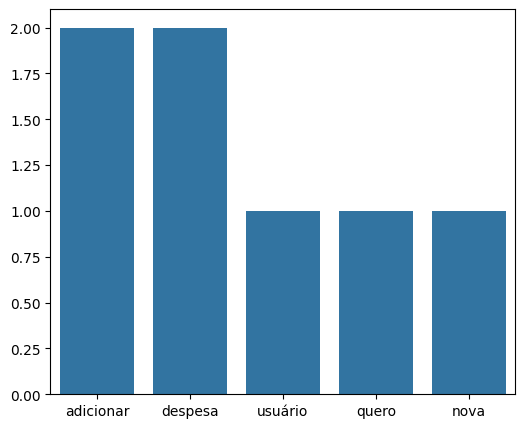

In [17]:
# Grafico para visualizar as palavras mais frequentes na primeira historia de usuario, mas poderia escolher qualquer historia aleatória

nome, valor = zip(*freq_dists[0].most_common(5))
fig, ax = plt.subplots(figsize=(6,5))
sns.barplot(x=np.array(nome), y=np.array(valor), ax=ax)
plt.show()

<Axes: >

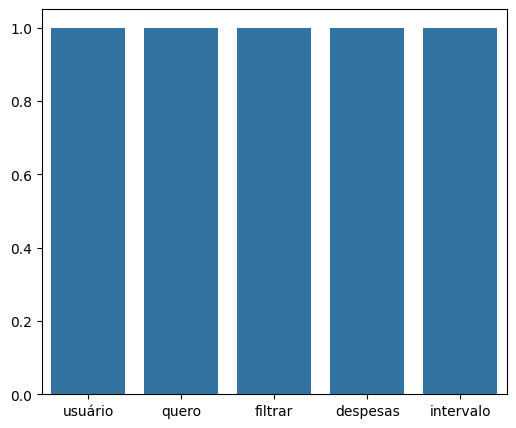

In [18]:
# Grafico para visualizar as palavras mais frequentes das historia de usuario.

nome,valor = zip(*freq_dists[i].most_common(5))
fig, ax = plt.subplots(figsize=(6,5))
sns.barplot(x=np.array(nome), y=np.array(valor), ax=ax)

In [19]:
# Imprime o rótulo previsto e a confiança associada a essa previsão para cada história.

for i, freq_dist in enumerate(freq_dists):
    historia_usuario = " ".join(freq_dist.keys())
    resultado = classificador(historia_usuario, candidate_labels=rotulos)
    top_label = resultado['labels'][0]
    confianca = resultado['scores'][0]
    print(f"História de Usuário {i+1}: Rótulo Previsto: {top_label}, Confiança: {confianca:.2f}")

História de Usuário 1: Rótulo Previsto: aplicativo, Confiança: 0.56
História de Usuário 2: Rótulo Previsto: aplicativo, Confiança: 0.34
História de Usuário 3: Rótulo Previsto: desempenho, Confiança: 0.44
História de Usuário 4: Rótulo Previsto: aplicativo, Confiança: 0.32
História de Usuário 5: Rótulo Previsto: desempenho, Confiança: 0.31
História de Usuário 6: Rótulo Previsto: desempenho, Confiança: 0.56
História de Usuário 7: Rótulo Previsto: desempenho, Confiança: 0.54
História de Usuário 8: Rótulo Previsto: aplicativo, Confiança: 0.45
História de Usuário 9: Rótulo Previsto: teste, Confiança: 0.40
História de Usuário 10: Rótulo Previsto: desempenho, Confiança: 0.39
História de Usuário 11: Rótulo Previsto: desempenho, Confiança: 0.50
História de Usuário 12: Rótulo Previsto: aplicativo, Confiança: 0.34
História de Usuário 13: Rótulo Previsto: teste, Confiança: 0.40
História de Usuário 14: Rótulo Previsto: aplicativo, Confiança: 0.42
História de Usuário 15: Rótulo Previsto: desempenho, 

In [20]:
#  Verificação que pode ser útil para entender como o modelo classifica as histórias de usuário e avaliar suas previsões.

for i, freq_dist in enumerate(freq_dists):
    historia_usuario = " ".join(freq_dist.keys())
    resultado = roberta(f"História de Usuário {i+1}: {historia_usuario}")
    print(f"Resultado para História de Usuário {i+1}:")
    for item in resultado:
        print(item)
    print()

Resultado para História de Usuário 1:
{'entity_group': 'LABEL_0', 'score': 0.5885319, 'word': ' historia de', 'start': 0, 'end': 11}
{'entity_group': 'LABEL_1', 'score': 0.6961965, 'word': ' usuario', 'start': 13, 'end': 19}
{'entity_group': 'LABEL_0', 'score': 0.6034355, 'word': ' 1 :', 'start': 21, 'end': 22}
{'entity_group': 'LABEL_1', 'score': 0.60484904, 'word': ' usuario quero adicionar', 'start': 24, 'end': 46}
{'entity_group': 'LABEL_0', 'score': 0.53196555, 'word': ' nova despesa', 'start': 48, 'end': 59}
{'entity_group': 'LABEL_1', 'score': 0.67061144, 'word': ' titulo supermercado clicando botao atualizar controle mensal', 'start': 61, 'end': 120}

Resultado para História de Usuário 2:
{'entity_group': 'LABEL_0', 'score': 0.5855491, 'word': ' historia de', 'start': 0, 'end': 11}
{'entity_group': 'LABEL_1', 'score': 0.6999238, 'word': ' usuario', 'start': 13, 'end': 19}
{'entity_group': 'LABEL_0', 'score': 0.6294581, 'word': ' 2 :', 'start': 21, 'end': 22}
{'entity_group': 'L

In [21]:
# Extrai as informações de quem é o autor e finalidade das histórias de usuário

def extracao(freq_dist):
    frequencia = " ".join(freq_dist.keys()).lower()

    autor = None
    if "testador" in frequencia:
        autor = "Testador"

    finalidade = None
    for word in ["quero", "preciso", "desejo"]:
        if word in frequencia:
            pos_inicial = frequencia.find(word) + len(word)
            finalidade = frequencia[pos_inicial:].strip().split(",")[0]
            break
    if "para" in frequencia:
        pos_inicial_para = frequencia.find("para") + len("para")
        finalidade = "para " + frequencia[pos_inicial_para:].strip().split(",")[0]


    return autor, finalidade


for i, freq_dist in enumerate(freq_dists):
    autor, finalidade = extracao(freq_dist)
    print("História do Usuário:", historias_usuario[i])
    print("Autor:", autor)
    print("Finalidade:", finalidade)
    print()


História do Usuário: Como usuário, eu quero adicionar uma nova despesa com o título Supermercado clicando no botão de adicionar despesa, para atualizar meu controle mensal.
Autor: None
Finalidade: adicionar nova despesa título supermercado clicando botão atualizar controle mensal

História do Usuário: Como usuário, eu quero adicionar uma nova despesa com o título Livros clicando no botão de adicionar despesa, para atualizar meu controle mensal.
Autor: None
Finalidade: adicionar nova despesa título livros clicando botão atualizar controle mensal

História do Usuário: Como usuário, eu quero inserir o preço da despesa como o valor de R$ 300.00, para registrar o valor da despesa.
Autor: None
Finalidade: inserir preço despesa valor r 300.00 registrar

História do Usuário: Como usuário, eu quero inserir o título da despesa como Mensalidade, para identificar facilmente a despesa.
Autor: None
Finalidade: inserir título despesa mensalidade identificar facilmente

História do Usuário: Como usuár